In [1]:
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
import pandas as pd
import seaborn as sns
import joblib

import sys
sys.path.append('../src/')
import data_loader
import config

In [2]:
model_path = "../models/regressor_model_fried.joblib"
model = joblib.load(model_path)

In [3]:
# Load the data
X, y = data_loader.load_data()

In [4]:
# Optional: Split the data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Predict on the entire dataset
y_pred = model.predict(X)

# or predict on the test set
#y_pred = model.predict(X_test)

c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


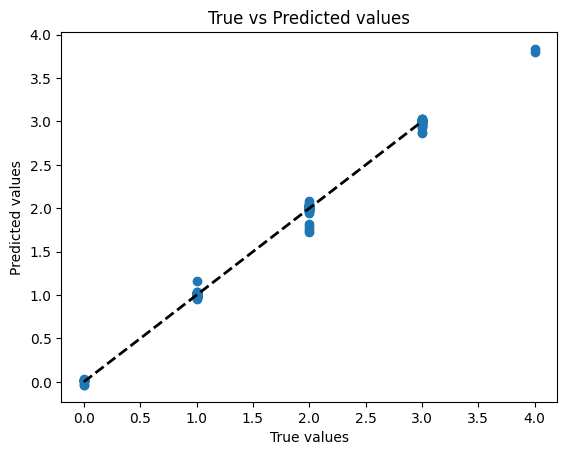

In [6]:
# Plot the results in a scatter plot
plt.scatter(y, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Identity line
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted values")
plt.show()

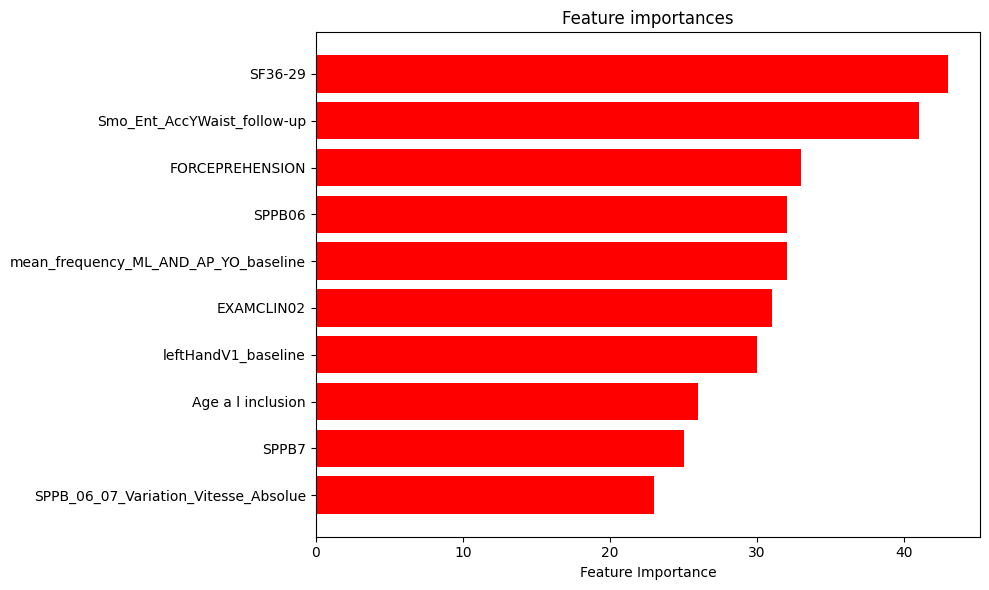

In [7]:
# Plot the 10 most important features
feature_importances = model.feature_importances_
feature_names = data_loader.get_feature_names()
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))  
plt.title("Feature importances")
plt.barh(range(10), feature_importances[indices[:10]], color="r", align="center")
plt.yticks(range(10), feature_names[indices[:10]])
plt.gca().invert_yaxis()  # invert y-axis to have the most important feature on top
plt.xlabel("Feature Importance")
plt.tight_layout()  # adjust layout to fit all labels
plt.show()
